## The locus $uMPS(D,d,N)$ of uniform matrix product states is defined as the constructible image of the polynomial map $$ (\mathbb{C}^{D \times D})^d \to (\mathbb{C}^d)^{\otimes N}, (M_0, \ldots, M_{d-1}) \mapsto \sum_{0 \leq i_1, \ldots, i_N \leq d-1} tr(M_{i_1} \cdots M_{i_N}) e_{i_1} \otimes \cdots \otimes e_{i_N} \mbox{.}$$
## Here we consider the case $(D,d,N) = (2,2,4)$.

Our implementation $\mathtt{ConstructibleImage}$ finishes in less than 15 seconds and outperforms
* $\mathtt{totalImage}$ (Macaulay2 package $\mathtt{TotalImage}$ [HMS18,CMS])
* $\mathtt{grobcov}$ (Singular package $\mathtt{grobcov.lib}$ [MW10])
* $\mathtt{PolynomialMapImage}$ ($\mathsf{Maple}$ package $\mathtt{RegularChains}$ [CGL+07])
* $\mathtt{Comprehensive}$ ($\mathsf{Maple}$ package $\mathtt{AlgebraicThomas}$ [BGLHR12])

which did not finish after a day.


[HMS18] Corey Harris, Mateusz Michałek, and Emre Can Sertöz, Computing images of polynomial maps, (arXiv:1801.00827), 2018.

[CMS] Adam Czaplin ́ski, Mateusz Michałek, and Tim Seynnaeve, Uniform matrix product states from an algebraic geometer’s point of view.

[MW10] Antonio Montes and Michael Wibmer, Gröbner bases for polynomial systems with parameters, J. Symbolic Comput. 45 (2010), no. 12, 1391–1425. MR 2733386

[CGL+07] Changbo Chen, Oleg Golubitsky, François Lemaire, Marc Moreno Maza, and Wei Pan, Com- prehensive triangular decomposition, Computer Algebra in Scientific Computing (Berlin, Hei- delberg) (Victor G. Ganzha, Ernst W. Mayr, and Evgenii V. Vorozhtsov, eds.), Springer Berlin Heidelberg, 2007, pp. 73–101.

[BGLHR12] Thomas Bächler, Vladimir Gerdt, Markus Lange-Hegermann, and Daniel Robertz, Algorithmic Thomas decomposition of algebraic and differential systems, J. Symbolic Comput. 47 (2012), no. 10, 1233–1266, (arXiv:1108.0817). MR 2926124

In [1]:
using HomalgProject

Adding path /Users/mo/.julia/dev/GAP/gap/.libs to DL_LOAD_PATH
 ┌───────┐   GAP 4.10dev-2263-g9f330be of today
 │  GAP  │   https://www.gap-system.org
 └───────┘   Architecture: x86_64-apple-darwin18.6.0-julia64-kv7
 Configuration:  gmp 6.1.2, Julia GC, Julia 1.2.0
 Loading the library and packages ...
 Packages:   GAPDoc 1.6.3, PrimGrp 3.3.2, SmallGrp 1.3, TransGrp 2.0.4
 Try '??help' for help. See also '?copyright', '?cite' and '?authors'


In [2]:
LoadPackageAndExposeGlobals( "ZariskiFrames", Main, all_globals = true )

In [3]:
ℚ = HomalgFieldOfRationalsInSingular( )

                     SINGULAR                                 /  Development
 A Computer Algebra System for Polynomial Computations       /   version 4.1.1
                                                           0<
 by: W. Decker, G.-M. Greuel, G. Pfister, H. Schoenemann     \   Feb 2018
FB Mathematik der Universitaet, D-67653 Kaiserslautern        \


GAP: Q

In [4]:
B = ℚ["t0000,t0001,t0011,t0111,t1111,t0101"]

GAP: Q[t0000,t0001,t0011,t0111,t1111,t0101]

In [5]:
T = ℚ["s_0..4"]

GAP: Q[s_0,s_1,s_2,s_3,s_4]

In [6]:
ϕ = RingMap( HomalgMatrix( "-(1/2)*s_0^4+s_0^2*s_2+(1/2)*s_2^2,-(1/2)*s_0^3*s_1+(1/2)*s_0*s_1*s_2+(1/2)*s_0^2*s_3+(1/2)*s_2*s_3,-(1/2)*s_0^2*s_1^2+s_0*s_1*s_3+(1/2)*s_2*s_4,-(1/2)*s_0*s_1^3+(1/2)*s_1^2*s_3+(1/2)*s_0*s_1*s_4+(1/2)*s_3*s_4,-(1/2)*s_1^4+s_1^2*s_4+(1/2)*s_4^2,-(1/2)*s_0^2*s_1^2+(1/2)*s_1^2*s_2+(1/2)*s_0^2*s_4+s_3^2-(1/2)*s_2*s_4", 6, 1, T ),  B, T );

In [7]:
Display( ϕ )

Q[s_0,s_1,s_2,s_3,s_4]
  ^
  |
[ -1/2*s_0^4+s_0^2*s_2+1/2*s_2^2, 
  -1/2*s_0^3*s_1+1/2*s_0*s_1*s_2+1/2*s_0^2*s_3+1/2*s_2*s_3, 
  -1/2*s_0^2*s_1^2+s_0*s_1*s_3+1/2*s_2*s_4, 
  -1/2*s_0*s_1^3+1/2*s_1^2*s_3+1/2*s_0*s_1*s_4+1/2*s_3*s_4, 
  -1/2*s_1^4+s_1^2*s_4+1/2*s_4^2, 
  -1/2*s_0^2*s_1^2+1/2*s_1^2*s_2+1/2*s_0^2*s_4+s_3^2-1/2*s_2*s_4 ]
  |
  |
Q[t0000,t0001,t0011,t0111,t1111,t0101]


In [8]:
im = ConstructibleImage( ϕ )

GAP: ( V_{Q[t0000,t0001,t0011,t0111,t1111,t0101]}( I1 ) \ V_{Q[t0000,t0001,t0011,t0\
111,t1111,t0101]}( J1_1 ) \ V_{Q[t0000,t0001,t0011,t0111,t1111,t0101]}( J1_2 )\
 ) ∪ ( V_{Q[t0000,t0001,t0011,t0111,t1111,t0101]}( I2 ) \ V_{Q[t0000,t0001,t\
0011,t0111,t1111,t0101]}( J2_1 ) )

In [9]:
Display( im )

V( <2*t0011^6-12*t0001*t0011^4*t0111+16*t0001^2*t0011^2*t0111^2+4*t0000*t0011^\
3*t0111^2-8*t0000*t0001*t0011*t0111^3+t0000^2*t0111^4+4*t0001^2*t0011^3*t1111-\
t0000*t0011^4*t1111-8*t0001^3*t0011*t0111*t1111+2*t0000*t0001^2*t0111^2*t1111+\
t0001^4*t1111^2+8*t0001*t0011^3*t0111*t0101-16*t0001^2*t0011*t0111^2*t0101-4*t\
0000*t0011^2*t0111^2*t0101+4*t0000*t0001*t0111^3*t0101-4*t0001^2*t0011^2*t1111\
*t0101+4*t0001^3*t0111*t1111*t0101+8*t0000*t0001*t0011*t0111*t1111*t0101-2*t00\
00^2*t0111^2*t1111*t0101-2*t0000*t0001^2*t1111^2*t0101-t0011^4*t0101^2+4*t0001\
^2*t0111^2*t0101^2+4*t0000*t0011*t0111^2*t0101^2+4*t0001^2*t0011*t1111*t0101^2\
-2*t0000*t0011^2*t1111*t0101^2-4*t0000*t0001*t0111*t1111*t0101^2+t0000^2*t1111\
^2*t0101^2-2*t0000*t0111^2*t0101^3-2*t0001^2*t1111*t0101^3+t0000*t1111*t0101^4\
> ) \ V( <t0011-t0101,4*t0001*t0111^3+t0001^2*t1111^2-6*t0001*t0111*t1111*t010\
1-3*t0111^2*t0101^2+4*t1111*t0101^3,-4*t0001*t0111+t0000*t1111+3*t0101^2,t0000\
*t0111^2+t0001^2*t1111-6*t0001*t0111*t01

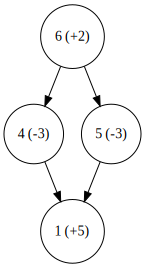

In [10]:
VisualizeInJulia( im )

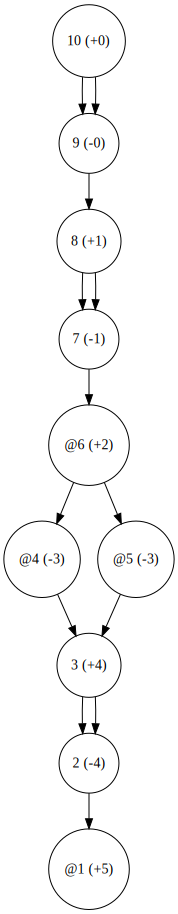

In [11]:
VisualizeInJulia( im, all = true )